# Pandas计算（常用内建函数）

### 1、 pct_change()
计算百分比变化Percentage Change

In [1]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

stock1 = pd.read_excel('sz50.xlsx',sheetname='600036.XSHG', index_col='datetime')

In [2]:
one_day_change = stock1.close.pct_change()
five_day_change = stock1.close.pct_change(5)
ten_day_change = stock1.close.pct_change(10)

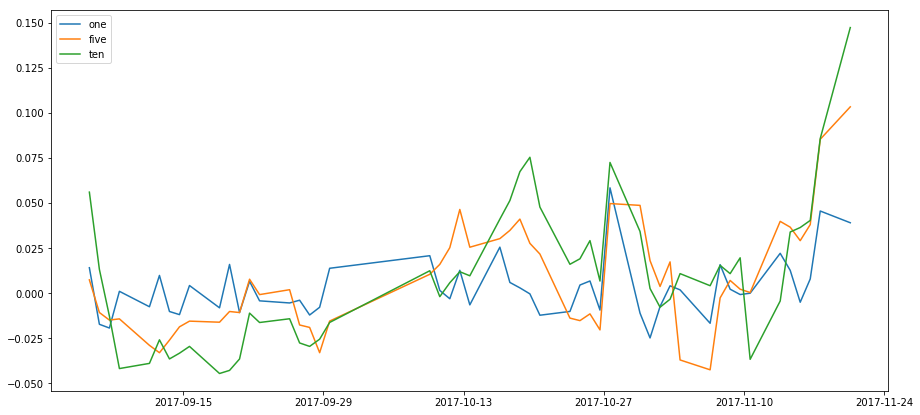

In [3]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15,7))
plt.plot(one_day_change.iloc[-50:], label='one')
plt.plot(five_day_change.iloc[-50:], label='five')
plt.plot(ten_day_change.iloc[-50:], label='ten')
plt.legend()
plt.show()

### 2、 cov() & cor()

$cov = E[(x - \mu x)(y-\mu y)]$

$cor = cov/ (\sigma x* \sigma y)$

In [4]:
# example:
import numpy as np

aArray = np.array([4,1,3,3,4,5])
bArray = np.array([2,2,2,1,2,3])

cov = ((aArray-aArray.mean())*(bArray-bArray.mean())).sum()/(len(aArray)-1)
cov1 = ((aArray-aArray.mean())*(bArray-bArray.mean())).sum()/len(aArray)
cor = cov1/(aArray.std()*bArray.std())

In [5]:
cov

0.4

In [6]:
np.cov(aArray,bArray)[0][1]

0.4

In [7]:
cor

0.4629100498862757

In [8]:
np.corrcoef(aArray,bArray)[0][1]

0.46291004988627565

**cov()**

计算协方差Covariance

In [9]:
stock2 = pd.read_excel('sz50.xlsx',sheetname='600050.XSHG', index_col='datetime')
stock3 = pd.read_excel('sz50.xlsx',sheetname='601318.XSHG', index_col='datetime')

In [10]:
five_day_df = pd.concat([stock1.close.pct_change(5),stock2.close.pct_change(5),stock3.close.pct_change(5)],keys=['stock1','stock2','stock3'],axis=1)

In [11]:
print(five_day_df.tail())

                       stock1    stock2    stock3
datetime                                         
2017-11-14 15:00:00  0.036622 -0.014538  0.077249
2017-11-15 15:00:00  0.029140  0.018947  0.071039
2017-11-16 15:00:00  0.038049 -0.029293  0.100700
2017-11-17 15:00:00  0.085355 -0.034102  0.076982
2017-11-20 15:00:00  0.103342 -0.016064  0.079239


In [12]:
print(five_day_df.cov())

          stock1    stock2    stock3
stock1  0.001271  0.000139  0.000806
stock2  0.000139  0.003739  0.000608
stock3  0.000806  0.000608  0.001203


**corr()**

计算相关系数Correlation

In [13]:
# 相关系数
correlation = five_day_df.corr()
print(correlation)

          stock1    stock2    stock3
stock1  1.000000  0.085415  0.652129
stock2  0.085415  1.000000  0.315773
stock3  0.652129  0.315773  1.000000


In [14]:
# spearman排序相关性
spearman = five_day_df.corr(method='spearman')
print(spearman)

          stock1    stock2    stock3
stock1  1.000000 -0.003432  0.659493
stock2 -0.003432  1.000000  0.165067
stock3  0.659493  0.165067  1.000000


### 3、 rank()
数据排序

In [15]:
print(five_day_df.tail())

                       stock1    stock2    stock3
datetime                                         
2017-11-14 15:00:00  0.036622 -0.014538  0.077249
2017-11-15 15:00:00  0.029140  0.018947  0.071039
2017-11-16 15:00:00  0.038049 -0.029293  0.100700
2017-11-17 15:00:00  0.085355 -0.034102  0.076982
2017-11-20 15:00:00  0.103342 -0.016064  0.079239


In [16]:
# 正向纵序
print(five_day_df.tail().rank(axis=0))

                     stock1  stock2  stock3
datetime                                   
2017-11-14 15:00:00     2.0     4.0     3.0
2017-11-15 15:00:00     1.0     5.0     1.0
2017-11-16 15:00:00     3.0     2.0     5.0
2017-11-17 15:00:00     4.0     1.0     2.0
2017-11-20 15:00:00     5.0     3.0     4.0


In [17]:
#横向倒序
print(five_day_df.rank(axis=1, ascending=False).tail())

                     stock1  stock2  stock3
datetime                                   
2017-11-14 15:00:00     2.0     3.0     1.0
2017-11-15 15:00:00     2.0     3.0     1.0
2017-11-16 15:00:00     2.0     3.0     1.0
2017-11-17 15:00:00     1.0     3.0     2.0
2017-11-20 15:00:00     1.0     3.0     2.0


### 4、 rolling()
滚动计算

In [18]:
rolling = stock1.close.rolling(window=20)

In [19]:
print(rolling.mean().tail())

datetime
2017-11-14 15:00:00    108.1320
2017-11-15 15:00:00    108.2855
2017-11-16 15:00:00    108.4850
2017-11-17 15:00:00    109.0060
2017-11-20 15:00:00    109.8100
Name: close, dtype: float64


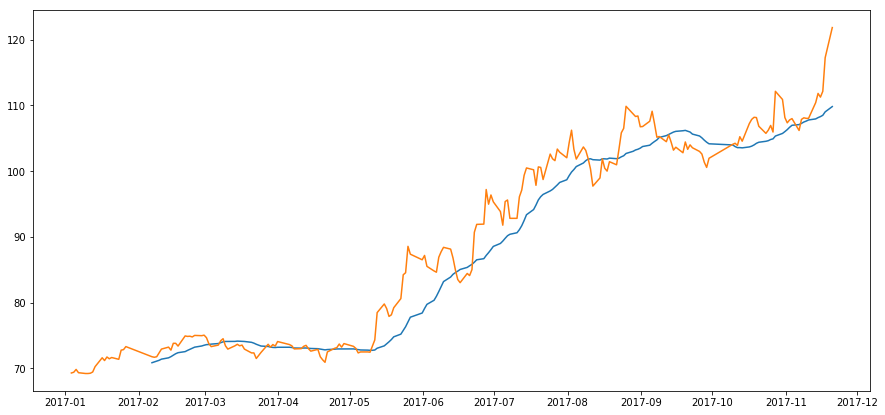

In [20]:
plt.figure(figsize=(15,7))
plt.plot(rolling.mean())
plt.plot(stock1.close)
plt.show()

### 5、 expanding
expanding不会返回NaN，功能与rolling相似。

In [ ]:
sn = pd.Series([1, 2, np.nan, 3, np.nan, 4])

In [ ]:
print(sn.expanding().sum())

In [ ]:
print(sn.cumsum())

In [ ]:
print(sn.cumsum().fillna(method='ffill'))

### 6、 apply() & aggregate()

**apply**

调用自定义函数

In [21]:
import numpy as np

def cal_range(array):
    return array.max() - array.min()

print(stock1.rolling(10).apply(cal_range).tail())

                     close   high    low   open      volume
datetime                                                   
2017-11-14 15:00:00   5.63   5.63   5.70   4.83  45715400.0
2017-11-15 15:00:00   5.63   5.63   5.70   5.55  45715400.0
2017-11-16 15:00:00   5.95   5.63   5.70   5.55  45599200.0
2017-11-17 15:00:00  11.06  10.17   8.06   6.83  55576000.0
2017-11-20 15:00:00  13.96  13.92  10.34  10.82  55576000.0


**aggregate**

聚合，主要用于处理数据运算(诸如统计平均值,求和等)，并返回计算后的运算结果。

In [25]:
# 对多只股票进行求和
import numpy as np
sum_agg = five_day_df.rolling(10).aggregate(np.sum)
print(sum_agg.tail())

                       stock1    stock2    stock3
datetime                                         
2017-11-14 15:00:00  0.025171  0.478886  0.434446
2017-11-15 15:00:00  0.050571  0.396198  0.438228
2017-11-16 15:00:00  0.071251  0.293819  0.494201
2017-11-17 15:00:00  0.193616  0.243951  0.563012
2017-11-20 15:00:00  0.339433  0.238697  0.643087


In [26]:
# 对stock1进行多个不同的计算
multi_agg = five_day_df.stock1.rolling(10).agg([np.sum, np.mean, np.std])
print(multi_agg.tail())

                          sum      mean       std
datetime                                         
2017-11-14 15:00:00  0.025171  0.002517  0.026701
2017-11-15 15:00:00  0.050571  0.005057  0.028006
2017-11-16 15:00:00  0.071251  0.007125  0.029727
2017-11-17 15:00:00  0.193616  0.019362  0.034364
2017-11-20 15:00:00  0.339433  0.033943  0.036102


In [27]:
# 针对不要数据用不同算法
multi_algo = five_day_df.rolling(20).agg({'stock1' : np.sum,
       'stock2' : np.std,
       'stock3' : np.mean})

print(multi_algo.tail())

                       stock1    stock2    stock3
datetime                                         
2017-11-14 15:00:00  0.171306  0.049099  0.046782
2017-11-15 15:00:00  0.159352  0.048760  0.047016
2017-11-16 15:00:00  0.169747  0.046769  0.049882
2017-11-17 15:00:00  0.233389  0.046673  0.052029
2017-11-20 15:00:00  0.350535  0.046850  0.053621


In [28]:
# resample成周线后用agg获取所需要的数据
print(stock1.resample('W').agg({'high':'max','low':'min', 'close':'last', 'open':'first'}).tail())

              high     low   close    open
datetime                                  
2017-10-29  112.29  105.38  112.13  106.66
2017-11-05  111.93  106.22  107.98  111.05
2017-11-12  109.49  104.87  108.02  107.34
2017-11-19  117.67  108.46  117.24  108.46
2017-11-26  122.50  116.20  121.82  116.92


## Computing rolling pairwise covariances and correlations

In [22]:
## 50天滚动的五日收益协方差

cov_50 = five_day_df.rolling(50).cov()

print(cov_50.tail(6))

                              stock1    stock2    stock3
datetime                                                
2017-11-17 15:00:00 stock1  0.000743  0.000248  0.000773
                    stock2  0.000248  0.001945  0.000923
                    stock3  0.000773  0.000923  0.001420
2017-11-20 15:00:00 stock1  0.000931  0.000207  0.000865
                    stock2  0.000207  0.001925  0.000875
                    stock3  0.000865  0.000875  0.001438


In [23]:
## 50天滚动的五日收益相关性

corr_50 = five_day_df.rolling(50,).corr()
print(corr_50.tail(6))

                              stock1    stock2    stock3
datetime                                                
2017-11-17 15:00:00 stock1  1.000000  0.206307  0.752711
                    stock2  0.206307  1.000000  0.555120
                    stock3  0.752711  0.555120  1.000000
2017-11-20 15:00:00 stock1  1.000000  0.154276  0.747151
                    stock2  0.154276  1.000000  0.525728
                    stock3  0.747151  0.525728  1.000000


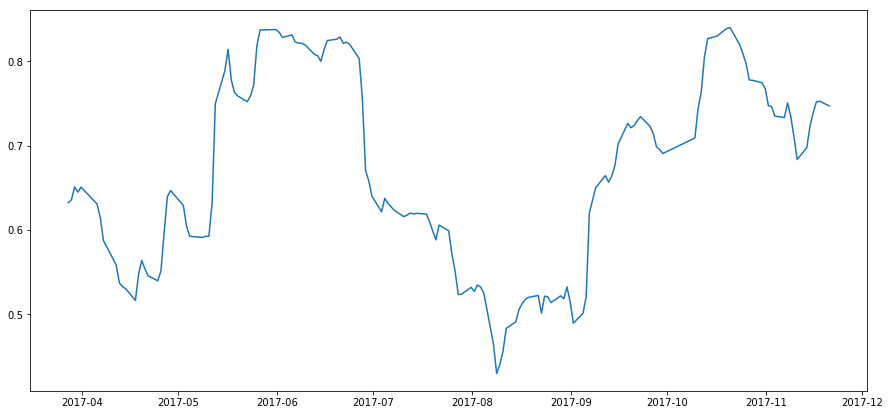

In [24]:
plt.figure(figsize=(15,7))
plt.plot(corr_50.unstack()['stock1','stock3'])
plt.show()